In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('c:\\dados\\cars-uci-linked.csv',delimiter=';')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu
1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320
2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite
3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst
4,17.0,8,3020,140.0,3449,105,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    int64  
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    int64  
 6   year          406 non-null    int64  
 7   origin        406 non-null    int64  
 8   name          406 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 28.7+ KB


In [5]:
df=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    int64  
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    int64  
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 30.6+ KB


In [7]:
X=np.array(df['horsepower'])
y=np.array(df['mpg'])

In [8]:
#gradient
def grad(thet0,theta1,X,y):
    soma1,soma2=0.0,0.0
    for i in range(len(X)):
        soma1+=theta0+theta1*X[i]-y[i]
        soma2+=(theta0+theta1*X[i]-y[i])*X[i]
    m=len(X)
    return (((2/m)*soma1,(2/m)*soma2))

In [9]:
#loss function
def mse(theta0,theta1,X,y):
    ye=np.array([theta0+theta1*X[i] for i in range(len(X))])
    mse=(1/len(X))*sum([(ye[i]-y[i])**2 for i in range(len(X))])
    return mse

In [10]:
#gradient descent
lmse=[]
theta0,theta1=0.5,0.5
lmse.append(mse(theta0,theta1,X,y))
lr=0.00005
for i in range(1000000):
    g=grad(theta0,theta1,X,y)
    theta0=theta0-lr*g[0]
    theta1=theta1-lr*g[1]
    lmse.append(mse(theta0,theta1,X,y)) 
    if abs(lmse[i+1]-lmse[i])<0.0000001:
        break
    if i%1000==0:print(i,lmse[i+1])
    

0 284.525476138955
1000 205.06042855491702
2000 200.79192608034856
3000 196.62402231796156
4000 192.55434638922068
5000 188.5805832917045
6000 184.700472582234
7000 180.91180709103824
8000 177.2124316662228
9000 173.60024194782966
10000 170.0731831707885
11000 166.6292489960807
12000 163.26648036944886
13000 159.9829644070049
14000 156.77683330710158
15000 153.64626328784775
16000 150.58947354966548
17000 147.60472526229708
18000 144.69032057568387
19000 141.84460165415916
20000 139.06594973340137
21000 136.3527841996122
22000 133.703561690399
23000 131.11677521684354
24000 128.5909533062646
25000 126.12465916518272
26000 123.7164898620107
27000 121.36507552900846
28000 119.06907858304376
29000 116.82719296471943
30000 114.63814339543215
31000 112.50068465193974
32000 110.4136008580264
33000 108.37570479286194
34000 106.38583721565881
35000 104.44286620624997
36000 102.54568652120271
37000 100.69321896511177
38000 98.88440977670572
39000 97.11823002942549
40000 95.39367504612629
41000 

In [11]:
theta0,theta1

(39.748356393798055, -0.15626393552430637)

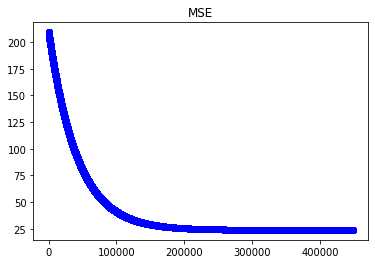

In [15]:
plt.title('MSE')
plt.plot(lmse[50:],'bo')
plt.show()

In [14]:
lmse[-1]

23.947855773682676

In [16]:
def mpg(pot,theta0,theta1):
    return theta0+theta1*pot

In [18]:
mpg(150,theta0,theta1)

16.3087660651521

In [19]:
ye=np.array([theta0+theta1*X[i] for i in range(len(X))])
df['mpg_model']=ye

In [20]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_model
0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu,19.434045
1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320,13.964807
2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite,16.308766
3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst,16.308766
4,17.0,8,3020,140.0,3449,105,70,1,ford torino,17.871405
